#### Exercise 1
Search the web for "spoof newspaper headlines", to find such gems as: British Left Waffles on Falkland Islands, and Juvenile Court to Try Shooting Defendant. Manually tag these headlines to see if knowledge of the part-of-speech tags removes the ambiguity.

Kids(NOUN) Make(are) Nutritious(ADJ) Snacks(NOUN) - Predicted
Kids(NOUN) Make(VERB, prepare) Nutritious(ADJ) Snacks(NOUN) - Actual

The above headline can mean that kids are nutritious snacks which is funny. Another meaning could be that Kids is a company that prepares nutritious snacks. Another interpretation can be kids cook nutritions snacks

Below code is an experimentation to see how the taggers work on such ambiguous sentences

In [1]:
import nltk
from nltk.corpus import brown

In [2]:
headline1='British Left Waffles on Falkland Islands';
headline2='Juvenile Court to Try Shooting Defendant';

In [3]:
h1_tokens=nltk.word_tokenize(headline1);
h2_tokens=nltk.word_tokenize(headline2);

In [4]:
t0=nltk.DefaultTagger('NOUN')
t0.tag(h1_tokens)

[('British', 'NOUN'),
 ('Left', 'NOUN'),
 ('Waffles', 'NOUN'),
 ('on', 'NOUN'),
 ('Falkland', 'NOUN'),
 ('Islands', 'NOUN')]

In [5]:
brown_news_words=[(w.lower(),t) for (w,t) in brown.tagged_words(categories='news',tagset='universal')]
brown_news_words[:5]

[('the', 'DET'),
 ('fulton', 'NOUN'),
 ('county', 'NOUN'),
 ('grand', 'ADJ'),
 ('jury', 'NOUN')]

In [6]:
def process_sents(corpus_sents):
#     corpus_sents=corpus_sents.copy()
    for i,sent in enumerate(corpus_sents):
        sent_lower=[(w.lower(),t) for (w,t) in sent];
        corpus_sents[i]=sent_lower;
    return corpus_sents;

In [7]:
brown_news_sents=brown.tagged_sents(categories='news',tagset='universal')

In [8]:
brown_news_sents=process_sents(list(brown_news_sents))

In [9]:
h1_tokens=[w.lower() for w in h1_tokens]
h2_tokens=[w.lower() for w in h2_tokens]

In [10]:
t1=nltk.UnigramTagger(brown_news_sents)
t1.tag(h2_tokens)

[('juvenile', 'ADJ'),
 ('court', 'NOUN'),
 ('to', 'PRT'),
 ('try', 'VERB'),
 ('shooting', 'VERB'),
 ('defendant', 'NOUN')]

In [11]:
t1=nltk.UnigramTagger(brown_news_sents,cutoff=2,backoff=t0)
t1.tag(h2_tokens)

[('juvenile', 'ADJ'),
 ('court', 'NOUN'),
 ('to', 'PRT'),
 ('try', 'VERB'),
 ('shooting', 'NOUN'),
 ('defendant', 'NOUN')]

In [12]:
t1.tag(h1_tokens)

[('british', 'ADJ'),
 ('left', 'VERB'),
 ('waffles', 'NOUN'),
 ('on', 'ADP'),
 ('falkland', 'NOUN'),
 ('islands', 'NOUN')]

In [13]:
t2=nltk.BigramTagger(brown_news_sents,cutoff=2,backoff=t1)
t2.tag(h1_tokens)

[('british', 'ADJ'),
 ('left', 'VERB'),
 ('waffles', 'NOUN'),
 ('on', 'ADP'),
 ('falkland', 'NOUN'),
 ('islands', 'NOUN')]

In [14]:
t2.tag(h2_tokens)

[('juvenile', 'ADJ'),
 ('court', 'NOUN'),
 ('to', 'PRT'),
 ('try', 'VERB'),
 ('shooting', 'NOUN'),
 ('defendant', 'NOUN')]

The taggers were not able to catch the correct parts of speech for the ambiguous words

#### Exercise 2
Working with someone else, take turns to pick a word that can be either a noun or a verb (e.g. contest); the opponent has to predict which one is likely to be the most frequent in the Brown corpus; check the opponent's prediction, and tally the score over several turns.

In [15]:
cfd=nltk.ConditionalFreqDist((word,tag) for word,tag in brown.tagged_words())
cfd['win']

FreqDist({'VB': 53, 'NN-HL': 1, 'VB-HL': 1})

In [16]:
cfd['power']

FreqDist({'NN': 321, 'NN-HL': 3, 'VB': 2})

#### Exercise 3
Tokenize and tag the following sentence: They wind back the clock, while we chase after the wind. What different pronunciations and parts of speech are involved?

In [17]:
sent='They wind back the clock, while we chase after the wind';
sent_tokens=nltk.wordpunct_tokenize(sent)

In [18]:
tags=['PRON','VERB','ADP','DET','NOUN','PUNCT','CONJ','PRON','VERB','ADP','DET','NOUN']

In [19]:
sent_tags=zip(sent_tokens,tags)
list(sent_tags)

[('They', 'PRON'),
 ('wind', 'VERB'),
 ('back', 'ADP'),
 ('the', 'DET'),
 ('clock', 'NOUN'),
 (',', 'PUNCT'),
 ('while', 'CONJ'),
 ('we', 'PRON'),
 ('chase', 'VERB'),
 ('after', 'ADP'),
 ('the', 'DET'),
 ('wind', 'NOUN')]

#### Exercise 4
Review the mappings in 3.1. Discuss any other examples of mappings you can think of. What type of information do they map from and to?

pronunciation dictionary - mapping from words to different pronunciations

#### Exercise 5
Using the Python interpreter in interactive mode, experiment with the dictionary examples in this chapter. Create a dictionary d, and add some entries. What happens if you try to access a non-existent entry, e.g. d['xyz']?

In [20]:
d={'a':1,'b':2}
# d[3] - gives key error
# KeyError Traceback (most recent call last)
# <ipython-input-101-9429970d33d2> in <module>
#       1 d={'a':1,'b':2}
# ----> 2 d[3]
# KeyError: 3

#### Exercise 6
Try deleting an element from a dictionary d, using the syntax del d['abc']. Check that the item was deleted.

In [21]:
del d['a']
d

{'b': 2}

#### Exercise 7
Create two dictionaries, d1 and d2, and add some entries to each. Now issue the command d1.update(d2). What did this do? What might it be useful for?

In [22]:
d1={'a':1,'b':2}
d2={'a':0,'b':1,'c':2}
d1.update(d2)
d1

{'a': 0, 'b': 1, 'c': 2}

d1.update(d2) updates the values of the common keys in d1 from d2 and adds the keys that aren't there in d1 <br>
This might be useful for designing a translator

#### Exercise 8
Create a dictionary e, to represent a single lexical entry for some word of your choice. Define keys like headword,  part-of-speech, sense, and example, and assign them suitable values.

In [23]:
e={}
e.update({'headword':'love','part-of-speech':['NOUN','VERB'],'sense':'an intense feeling of deep affection','example':['love is blind','I love NLP']})
e

{'headword': 'love',
 'part-of-speech': ['NOUN', 'VERB'],
 'sense': 'an intense feeling of deep affection',
 'example': ['love is blind', 'I love NLP']}

#### Exercise 9
Satisfy yourself that there are restrictions on the distribution of go and went, in the sense that they cannot be freely interchanged in the kinds of contexts illustrated in (3d) in 7.

In [24]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [25]:
text1.concordance('go',lines=5)

Displaying 5 of 194 matches:
by so much the more shall ye for ever go thankless ! Would that I could clear 
wallow up Jonah ." -- JONAH . " There go the ships ; there is that Leviathan w
ur children ' s grand - children will go for bread ." -- OBED MACY ' S HISTORY
 city of a dreamy Sabbath afternoon . Go from Corlears Hook to Coenties Slip ,
ed upon the magic stream before him . Go visit the Prairies in June , when for


In [26]:
text1.concordance('went',lines=5)

Displaying 5 of 97 matches:
boots are stopping the way . So on I went . I now by instinct followed the str
re I did . Supper over , the company went back to the bar - room , when , know
stove in the middle of the room , he went about his business , and left me in 
catches the worm . But to - night he went out a peddling , you see , and I don
ter a moment , and then up stairs we went , and I was ushered into a small roo


In [27]:
text1.common_contexts(['go','went'])

i_to but_on and_to it_, ,_on we_, i_; ,_round


#### Exercise 10
Train a unigram tagger and run it on some new text. Observe that some words are not assigned a tag. Why not?

In [28]:
t1=nltk.UnigramTagger(brown_news_sents)
t1.tag(h2_tokens)

[('juvenile', 'ADJ'),
 ('court', 'NOUN'),
 ('to', 'PRT'),
 ('try', 'VERB'),
 ('shooting', 'VERB'),
 ('defendant', 'NOUN')]

In [29]:
t1.tag(h1_tokens)

[('british', 'ADJ'),
 ('left', 'VERB'),
 ('waffles', None),
 ('on', 'ADP'),
 ('falkland', None),
 ('islands', 'NOUN')]

Because they were not seen in the training text

#### Exercise 11
Learn about the affix tagger (type help(nltk.AffixTagger)). Train an affix tagger and run it on some new text. Experiment with different settings for the affix length and the minimum word length. Discuss your findings.

In [30]:
affix_tagger=nltk.AffixTagger(brown_news_sents,affix_length=-1,min_stem_length=2)
affix_tagger.tag(h1_tokens)

[('british', 'ADP'),
 ('left', 'NOUN'),
 ('waffles', 'NOUN'),
 ('on', None),
 ('falkland', 'VERB'),
 ('islands', 'NOUN')]

In [31]:
affix_tagger=nltk.AffixTagger(brown_news_sents,affix_length=-1,min_stem_length=0)
affix_tagger.tag(h1_tokens)

[('british', 'ADP'),
 ('left', 'NOUN'),
 ('waffles', 'NOUN'),
 ('on', 'NOUN'),
 ('falkland', 'VERB'),
 ('islands', 'NOUN')]

In [32]:
affix_tagger=nltk.AffixTagger(brown_news_sents,affix_length=1,min_stem_length=0)
affix_tagger.tag(h1_tokens)

[('british', 'NOUN'),
 ('left', 'NOUN'),
 ('waffles', 'VERB'),
 ('on', 'ADP'),
 ('falkland', 'ADP'),
 ('islands', 'ADP')]

In [33]:
t1.tag(['waffle'])

[('waffle', None)]

Affix Tagger was atleast able to tag waffles compared to the Unigram Tagger which tagged it to None. When used for prefix, it correctly tags it as VERB but incorrectly tags the other words

#### Exercise 12
Train a bigram tagger with no backoff tagger, and run it on some of the training data. Next, run it on some new data. What happens to the performance of the tagger? Why?

In [34]:
train_set=brown_news_sents[:round(0.9*len(brown_news_sents))];
test_set=brown_news_sents[round(0.9*len(brown_news_sents)):]

In [35]:
t2=nltk.BigramTagger(train_set);
t2.evaluate(train_set)

0.8780512050188871

In [36]:
t2.evaluate(test_set)

0.15595047923322683

The performance decreases beacause it tags the unseen words as None

#### Exercise 13
We can use a dictionary to specify the values to be substituted into a formatting string. Read Python's library documentation for formatting strings http://docs.python.org/lib/typesseq-strings.html and use this method to display today's date in two different formats.

In [37]:
'Today is {dd}st of {mm},{yyyy}'.format(**{'mm':'March','dd':1,'yyyy':2019})

'Today is 1st of March,2019'

In [38]:
'Today is {mm}-{dd}-{yyyy}'.format(**{'mm':'03','dd':'01','yyyy':2019})

'Today is 03-01-2019'

In [39]:
'Today is {mm}/{dd}/{yyyy}'.format(**{'mm':3,'dd':1,'yyyy':2019})

'Today is 3/1/2019'

#### Exercise 14
Use sorted() and set() to get a sorted list of tags used in the Brown corpus, removing duplicates.

In [40]:
brown_words=brown.tagged_words(categories='news');
brown_words[:5]

[('The', 'AT'),
 ('Fulton', 'NP-TL'),
 ('County', 'NN-TL'),
 ('Grand', 'JJ-TL'),
 ('Jury', 'NN-TL')]

In [41]:
print(set(sorted(t for (w,t) in brown_words)))

{'BER*', 'DOZ', 'FW-NNS', 'MD*', 'NPS-HL', 'NN-TL-HL', 'FW-CC', 'NR', '(', 'VBZ', 'DTI-HL', 'NR-HL', 'DT+BEZ', 'OD-HL', 'PN+HVZ', 'FW-*', 'HVD', 'JJR-NC', 'BEN', 'DTI', 'BER-HL', 'NP+BEZ', 'BEZ', 'WDT+BEZ', 'BEZ*', 'PN$', 'BEDZ-HL', 'NP', '.-HL', 'JJ', ',', 'DT', 'PPSS', 'RB-TL', 'WDT', 'NN$', 'BED', '(-HL', 'VBN-TL', 'FW-IN', 'CD-HL', 'JJ-HL', 'FW-CD', 'JJR', 'NPS', 'CC-TL', 'CS', 'NN-NC', 'PPSS+HVD', 'PPLS', 'HVZ', 'ABN-HL', 'NPS$', 'VBZ-HL', 'RB$', 'IN-TL', 'CC-HL', 'DOD*', 'NNS-TL-HL', 'PN', 'VB-HL', 'DO-HL', 'VBD-TL', 'FW-IN+NN-TL', 'NR$', 'WRB', 'VB-TL', 'FW-JJ-TL', '*', 'NNS-HL', 'FW-AT-HL', 'HVN', 'BEDZ', 'MD+HV', 'WP$', 'MD*-HL', 'NP$', 'DO*', 'BED*', 'TO-HL', 'BE-HL', 'FW-IN+NN', 'MD-TL', 'FW-DT', ',-HL', 'CC', 'AP-TL', 'PPS+BEZ-HL', 'WPO', 'WPS', 'VBG', 'BEZ-HL', 'RP', 'NNS', 'CD$', ':-HL', 'FW-IN-TL', 'BER-TL', 'CD', 'PP$-TL', 'RB', 'CD-TL', 'VBG-HL', 'NP-TL', 'VBN', '``', 'NN-TL', 'AP', '*-HL', 'DTS', 'RBT', 'NP-HL', 'CS-HL', 'IN-HL', 'JJS-TL', 'HVD-HL', 'UH', 'PPSS+BEM', 

#### Exercise 15
Write programs to process the Brown Corpus and find answers to the following questions:
* Which nouns are more common in their plural form, rather than their singular form? (Only consider regular plurals, formed with the -s suffix.) <br>
* Which word has the greatest number of distinct tags. What are they, and what do they represent? <br>
* List tags in order of decreasing frequency. What do the 20 most frequent tags represent? <br>
* Which tags are nouns most commonly found after? What do these tags represent?

In [42]:
brown_words=brown.tagged_words()

In [43]:
fd=nltk.FreqDist(w for (w,t) in brown_words if t.startswith('NN'))

In [44]:
def pluralNouns():
    nouns=[];
    for n in fd:
        if n[:-1] in fd and fd[n]>fd[n[:-1]]:
            nouns.append(n);
    return nouns;

In [45]:
print(pluralNouns())

['County', 'voters', 'legislators', 'topics', 'steps', 'funds', 'items', 'taxpayers', 'fire', 'guardians', 'fees', 'citizens', 'servants', 'concessionaires', 'officials', 'employes', 'man', 'Aj', 'crowd', 'county', 'candidates', 'relations', 'years', 'study', '$100', 'bonds', 'sales', 'allowances', 'pay', 'members', 'board', 'bankers', 'rules', 'dollars', 'means', 'bank', 'treasurer', 'Bankers', 'obligations', 'customers', 'students', 'savings', 'capital', 'senators', 'retailers', 'fine', 'brokers', 'general', 'representatives', 'kind', 'Representatives', 'defenders', 'methods', 'hours', 'team', 'Corps', 'Army', 'firm', 'Co.', 'relatives', 'parents', 'defendants', 'burglary', 'observers', 'aspects', 'Cod', 'help', 'advisers', 'proceedings', 'workers', 'employer', 'boost', 'part', 'requirements', 'elements', 'fate', 'circumstances', 'critics', 'UN', 'manifestations', 'arms', 'States', 'mind', 'events', 'months', 'submarines', 'modifications', 'errors', 'conditions', 'channels', 'pin', '

In [46]:
cfd=nltk.ConditionalFreqDist((word,tag) for word,tag in brown_words)
maxim=0;
for w in cfd.conditions():
    if len(cfd[w])>maxim:
        maxim=len(cfd[w]);
        word_tags={w:list(cfd[w])};

In [47]:
print(word_tags,maxim)

{'that': ['CS', 'WPS', 'DT', 'QL', 'WPO', 'CS-HL', 'DT-NC', 'NIL', 'WPS-NC', 'WPO-NC', 'CS-NC', 'WPS-HL']} 12


In [48]:
fd=nltk.FreqDist(tag for word,tag in brown_words)
print(fd.most_common(20))

[('NN', 152470), ('IN', 120557), ('AT', 97959), ('JJ', 64028), ('.', 60638), (',', 58156), ('NNS', 55110), ('CC', 37718), ('RB', 36464), ('NP', 34476), ('VB', 33693), ('VBN', 29186), ('VBD', 26167), ('CS', 22143), ('PPS', 18253), ('VBG', 17893), ('PP$', 16872), ('TO', 14918), ('PPSS', 13802), ('CD', 13510)]


In [49]:
brown_ficWords=brown.tagged_words(categories='fiction');
fd=nltk.FreqDist(tag for (word,tag) in brown_ficWords)
print(fd.most_common(20))

[('NN', 7815), ('IN', 6012), ('AT', 5439), ('.', 4804), (',', 3654), ('VBD', 3027), ('JJ', 2958), ('RB', 2479), ('NNS', 2367), ('CC', 2257), ('VB', 2173), ('PPS', 2087), ('NP', 2026), ('PP$', 1503), ('VBN', 1497), ('VBG', 1375), ('PPO', 1228), ('CS', 1161), ('PPSS', 1131), ('BEDZ', 1091)]


They represent the common english usage,gives some idea of the genre and are mostly open class words

In [50]:
brown_words=brown.tagged_words(tagset='universal')

In [51]:
cfd=nltk.ConditionalFreqDist((t2,t1) for (w1,t1),(w2,t2) in nltk.bigrams(brown_words) if t2=='NOUN')
cfd

<ConditionalFreqDist with 1 conditions>

In [52]:
cfd['NOUN'].most_common(2)

[('DET', 85845), ('ADJ', 54653)]

Those tags represent the common grammar rules, nouns occur mostly after a determiner or an adjective

#### Exercise 16
Explore the following issues that arise in connection with the lookup tagger:<br>
* What happens to the tagger performance for the various model sizes when a backoff tagger is omitted? <br>
* Consider the curve in 4.2; suggest a good size for a lookup tagger that balances memory and performance. Can you come up with scenarios where it would be preferable to minimize memory usage, or to maximize performance with no regard for memory usage?

In [53]:
train_set=brown_words[:round(0.9*len(brown_words))]
test_set=brown.tagged_sents(tagset='universal')

In [54]:
def performance(likely_tags,test_set):
    lookup_tagger=nltk.UnigramTagger(model=likely_tags);
    return lookup_tagger.evaluate(test_set)

In [55]:
def display():
    import pylab;
    fd=nltk.FreqDist(w.lower() for (w,t) in train_set)
    cfd=nltk.ConditionalFreqDist((w.lower(),t) for (w,t) in train_set)
    most_frequent_words=[w for (w,_) in fd.most_common()];
    sizes=2**pylab.arange(15);
    perfs=[performance(dict((w,cfd[w].max()) for w in most_frequent_words[:size]),test_set) for size in sizes];
    pylab.plot(sizes,perfs,'-bo');
    pylab.title('Size vs Performance of an Unigram Tagger with no backoff');
    pylab.xlabel('Size');
    pylab.ylabel('Performance');
    pylab.show();

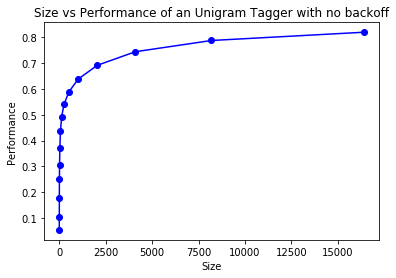

In [60]:
display()

The model performance for various sizes decreases without backoff tagger 

The optimal size for the curve in 4.2 is 12000 as there is only a little improvement in the performance from 12000 to 18000. <br>
It is preferable to limit the memory size for mobile applications. <br>
Prioritize performance maximization when the application runs on cloud and it is very very important to tag the text correctly than minimizing the memory (for ex:speech translators for military or foreign relations)

#### Exercise 17
What is the upper limit of performance for a lookup tagger, assuming no limit to the size of its table? (Hint: write a program to work out what percentage of tokens of a word are assigned the most likely tag for that word, on average.)

In [75]:
cfd=nltk.ConditionalFreqDist((w.lower(),t) for w,t in brown_words)
likely_tags=dict((w.lower(),cfd[w.lower()].max()) for w,tag in brown_words)

In [76]:
upper_bound=[w1 for (w1,t1) in brown_words if likely_tags[w1.lower()]==t1]
upper_bound=len(upper_bound)/len(brown_words)
round(upper_bound,2)

0.96

#### Exercise 18
Generate some statistics for tagged data to answer the following questions:<br>
* What proportion of word types are always assigned the same part-of-speech tag?<br>
* How many words are ambiguous, in the sense that they appear with at least two tags? <br>
* What percentage of word tokens in the Brown Corpus involve these ambiguous words?<br>

In [80]:
count=0;
for w in cfd.conditions():
    if len(cfd[w])==1:
        count+=1;

In [82]:
round(count/len(set(w.lower() for w,_ in brown_words)),2)

0.93

In [84]:
count=0
for w in cfd.conditions():
    if len(cfd[w])>1:
        count+=1;
count

3408

In [85]:
round(count/len(set(w.lower() for w,_ in brown_words)),2)

0.07

#### Exercise 19
The evaluate() method works out how accurately the tagger performs on this text. For example, if the supplied tagged text was [('the', 'DT'), ('dog', 'NN')] and the tagger produced the output [('the', 'NN'), ('dog', 'NN')], then the score would be 0.5. Let's try to figure out how the evaluation method works: <br>
* A tagger t takes a list of words as input, and produces a list of tagged words as output. However, t.evaluate() is given correctly tagged text as its only parameter. What must it do with this input before performing the tagging? <br>
* Once the tagger has created newly tagged text, how might the evaluate() method go about comparing it with the original tagged text and computing the accuracy score? <br>
* Now examine the source code to see how the method is implemented. Inspect nltk.tag.api.__file__ to discover the location of the source code, and open this file using an editor (be sure to use the api.py file and not the compiled api.pyc binary file).

first it needs to tag using tagger.tag and then evaluate

In [94]:
t1.tag(['the','dog'])

[('the', 'DET'), ('dog', 'NOUN')]

In [95]:
t1.evaluate([t1.tag(['the','dog'])])

1.0

It compares the tags of the words with the tags of words it was trained on and calculates the accuracy score.<br>
Score the accuracy of the tagger against the gold standard.
Strip the tags from the gold standard text, retag it using
the tagger, then compute the accuracy score.

#### Exercise 20
Write code to search the Brown Corpus for particular words and phrases according to tags, to answer the following questions: <br>
* Produce an alphabetically sorted list of the distinct words tagged as MD.
* Identify words that can be plural nouns or third person singular verbs (e.g. deals, flies). <br>
* Identify three-word prepositional phrases of the form IN + DET + NN (eg. in the lab). <br>
* What is the ratio of masculine to feminine pronouns?

In [103]:
brown_words_bt=brown.tagged_words()

In [108]:
print(sorted(set([w.lower() for w,tag in brown_words_bt if tag=='MD'])))

["c'n", 'can', 'colde', 'could', 'dare', 'kin', 'maht', 'mai', 'may', 'maye', 'mayst', 'might', 'must', 'need', 'ought', 'shall', 'should', 'shuld', 'shulde', 'wil', 'will', 'wilt', 'wod', 'wold', 'wolde', 'would']


In [110]:
print(set([w.lower() for w,tag in brown_words_bt if tag.startswith('NNS') or tag=='VBZ' ]))

{'vantage-points', 'shifts', 'fellow-craftsmen', 'asses', 'memoranda', 'rotates', 'marshmallows', 'tosses', 'sisters', "teachers'", "candidates'", 'skiffs', 'manes', 'cleanups', 'bafflers', 'aides', 'nutrients', 'value-judgments', 'densities', 'loins', 'classics', 'piers', 'shadings', 'ambiguities', 'bibliographies', 'burrs', 'share-holders', 'exemptions', 'resists', 'ghosts', 'ties', 'offensives', 'epithets', 'wolves', 'condemns', 'freewheelers', 'villagers', 'soldier-masters', 'enthusiasts', 'sponges', 'arrangements', 'sections', 'southerners', 'asterisks', '$.50', 'longs', 'shrines', 'posters', 'daises', 'revolutionaries', 'pirogues', 'menus', 'anastomoses', 'raptures', 'doubles', 'self-portraits', 'angles', 'violations', 'societies', 'occasions', 'shorts', '$18.2', 'non-writers', 'orthodontists', 'multiplies', 'bloops', 'newsmen', 'coyotes', 'credits', 'nomias', 'receipts', 'puddles', 'snacks', 'depositors', 'choices', 'climbs', 'correlations', 'buffalo', 'knocks', 'shotshells', 'n

In [121]:
print([(w1,w2,w3) for ((w1,t1),(w2,t2),(w3,t3)) in list(nltk.trigrams(brown_words_bt)) if t1.startswith('IN')and t2.startswith('DT') and t3.startswith('NN')])

[('of', 'this', 'city'), ('of', 'this', 'money'), ('of', 'these', 'funds'), ('in', 'each', 'county'), ('for', 'some', 'time'), ('in', 'this', 'county'), ('on', 'this', 'question'), ('with', 'any', 'relatives'), ('in', 'this', 'case'), ('of', 'that', 'court'), ('of', 'this', 'court'), ('in', 'these', 'cases'), ('on', 'each', 'worker'), ('on', 'that', 'date'), ('for', 'each', 'illness'), ('of', 'those', 'millions'), ('for', 'each', '$1,500'), ('for', 'another', 'setback'), ('on', 'this', 'score'), ('from', 'another', 'direction'), ('over', 'this', 'problem'), ('in', 'this', 'field'), ('in', 'this', 'matter'), ('of', 'these', 'men'), ('by', 'these', 'laws'), ('for', 'some', 'time'), ('in', 'some', 'instances'), ('with', 'any', 'degree'), ('into', 'this', 'campaign'), ('into', 'this', 'state'), ('at', 'this', 'time'), ('in', 'this', 'campaign'), ('in', 'those', 'counties'), ('from', 'this', "year's"), ('in', 'those', 'countries'), ('along', 'this', 'thoroughfare'), ('Along', 'this', 'avenu

In [128]:
len(set([w.lower() for w,t in brown_words if t=='PRON' and re.search(r'^he$|him.*|his.*',w)]))/len(set([w.lower() for w,t in brown_words if t=='PRON' and w.startswith(('she','her'))]))

1.5

#### Exercise 21
In 3.1 we saw a table involving frequency counts for the verbs adore, love, like, prefer and preceding qualifiers absolutely and definitely. Investigate the full range of adverbs that appear before these four verbs.

In [136]:
brown_words=brown.tagged_words(tagset='universal')

In [142]:
cfd=nltk.ConditionalFreqDist((w1.lower(),w2.lower()) for ((w1,t1),(w2,t2)) in nltk.bigrams(brown_words) if t1=='ADV' and w2.lower() in ['adore','love','like','prefer'] and t2=='VERB')

In [141]:
cfd.tabulate()

                like   love prefer 
       always      1      1      0 
       dearly      0      1      0 
         even      1      0      0 
    generally      0      0      1 
         just      0      1      0 
         much      0      0      1 
          not      9      1      1 
       rather      1      0      0 
       simply      1      0      0 
spontaneously      0      0      1 
         sure      1      0      0 


#### Exercise 22
We defined the regexp_tagger that can be used as a fall-back tagger for unknown words. This tagger only checks for cardinal numbers. By testing for particular prefix or suffix strings, it should be possible to guess other tags. For example, we could tag any word that ends with -s as a plural noun. Define a regular expression tagger (using  RegexpTagger()) that tests for at least five other patterns in the spelling of words. (Use inline documentation to explain the rules.)

In [174]:
test_sent = brown.sents(categories='news')[0]
regexp_tagger = nltk.RegexpTagger(
      [(r'^-?[0-9]+(.[0-9]+)?$', 'CD'),   # cardinal numbers
         (r'(The|the|A|a|An|an)$', 'AT'),   # articles
        (r'.*able$', 'JJ'),                # adjectives
        (r'.*ness$', 'NN'),                # nouns formed from adjectives
         (r'.*ly$', 'RB'),                  # adverbs
         (r'.*s$', 'NNS'),                  # plural nouns
         (r'.*ing$', 'VBG'),                # gerunds
         (r'.*ed$', 'VBD'),                 # past tense verbs
         (r'.*(him|her|his|he|she|it|they|them).*','PP'),
         (r'.*', 'NN')                      # nouns (default)
     ])

In [175]:
print(regexp_tagger.tag(test_sent))

[('The', 'AT'), ('Fulton', 'NN'), ('County', 'NN'), ('Grand', 'NN'), ('Jury', 'NN'), ('said', 'NN'), ('Friday', 'NN'), ('an', 'AT'), ('investigation', 'NN'), ('of', 'NN'), ("Atlanta's", 'NNS'), ('recent', 'NN'), ('primary', 'NN'), ('election', 'NN'), ('produced', 'VBD'), ('``', 'NN'), ('no', 'NN'), ('evidence', 'NN'), ("''", 'NN'), ('that', 'NN'), ('any', 'NN'), ('irregularities', 'NNS'), ('took', 'NN'), ('place', 'NN'), ('.', 'NN')]


#### Exercise 23
Consider the regular expression tagger developed in the exercises in the previous section. Evaluate the tagger using its accuracy() method, and try to come up with ways to improve its performance. Discuss your findings. How does objective evaluation help in the development process?

In [177]:
gold_sent = brown.tagged_sents(categories='news')[0]
gold_sent

[('The', 'AT'),
 ('Fulton', 'NP-TL'),
 ('County', 'NN-TL'),
 ('Grand', 'JJ-TL'),
 ('Jury', 'NN-TL'),
 ('said', 'VBD'),
 ('Friday', 'NR'),
 ('an', 'AT'),
 ('investigation', 'NN'),
 ('of', 'IN'),
 ("Atlanta's", 'NP$'),
 ('recent', 'JJ'),
 ('primary', 'NN'),
 ('election', 'NN'),
 ('produced', 'VBD'),
 ('``', '``'),
 ('no', 'AT'),
 ('evidence', 'NN'),
 ("''", "''"),
 ('that', 'CS'),
 ('any', 'DTI'),
 ('irregularities', 'NNS'),
 ('took', 'VBD'),
 ('place', 'NN'),
 ('.', '.')]

In [180]:
nltk.accuracy([t for w,t in gold_sent],[t for w,t in regexp_tagger.tag(test_sent)])

0.36

#### Exercise 24
How serious is the sparse data problem? Investigate the performance of n-gram taggers as n increases from 1 to 6. Tabulate the accuracy score. Estimate the training data required for these taggers, assuming a vocabulary size of 105 and a tagset size of 10^2.

In [223]:
brown_sents=brown.tagged_sents(tagset='universal')
train_set=brown_sents[:round(0.9*len(brown_sents))]
test_set=brown_sents[round(0.9*len(brown_sents)):]

In [226]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
def plotPerformance(train_data):
    perfs=[]
    perfs_b=[]
    for n in range(1,7):
        perfs.append(nltk.NgramTagger(n,train_set).evaluate(test_set))
    for n in range(1,7):
        t=perfs_b.append(nltk.NgramTagger(n,train_set,backoff=nltk.NgramTagger(n-1,train_set)).evaluate(test_set))  
    plt.plot([1,2,3,4,5,6],perfs,'-bo')
    plt.plot([1,2,3,4,5,6],perfs_b,'-ro')

Peformance decreased as n increased. This is not the case if backoff is used

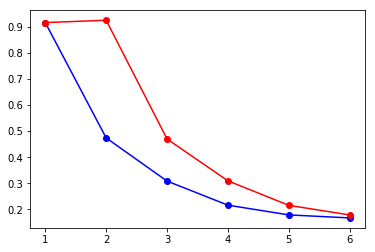

In [227]:
plotPerformance(train_set)

#### Exercise 25
Obtain some tagged data for another language, and train and evaluate a variety of taggers on it. If the language is morphologically complex, or if there are any orthographic clues (e.g. capitalization) to word classes, consider developing a regular expression tagger for it (ordered after the unigram tagger, and before the default tagger). How does the accuracy of your tagger(s) compare with the same taggers run on English data? Discuss any issues you encounter in applying these methods to the language.

In [228]:
indian_sents=nltk.corpus.indian.tagged_sents()
train_set=indian_sents[:round(0.9*len(indian_sents))]
test_set=indian_sents[round(0.9*len(indian_sents)):]

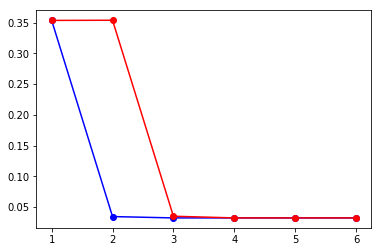

In [229]:
plotPerformance(train_set)

Yes, the accuracy compared with the english taggers

#### Exercise 26
4.1 plotted a curve showing change in the performance of a lookup tagger as the model size was increased. Plot the performance curve for a unigram tagger, as the amount of training data is varied.

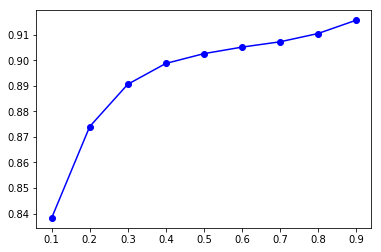

In [221]:
perfs=[]
start=0.1;
stop=0.9;
step=0.1
n=start;
while n<=stop:
    train_set=brown_sents[:round(n*len(brown_sents))]
    test_set=brown_sents[round(n*len(brown_sents)):]
    unigram_tagger=nltk.UnigramTagger(train_set);
    perfs.append(unigram_tagger.evaluate(test_set));
    n+=step;
plt.plot([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],perfs,'-bo')

#### Exercise 27
Inspect the confusion matrix for the bigram tagger t2 defined in 5, and identify one or more sets of tags to collapse. Define a dictionary to do the mapping, and evaluate the tagger on the simplified data.

Used universal tagset instead of collapsing tags

In [231]:
train_set=brown_sents[:round(0.9*len(brown_sents))]
test_set=brown_sents[round(0.9*len(brown_sents)):]

In [234]:
t0=nltk.DefaultTagger('NN')
t1=nltk.UnigramTagger(train_set,backoff=t0)
t2=nltk.BigramTagger(train_set,backoff=t1);

In [235]:
t2.evaluate(test_set)

0.9245510362314285

#### Exercise 28
Experiment with taggers using the simplified tagset (or make one of your own by discarding all but the first character of each tag name). Such a tagger has fewer distinctions to make, but much less information on which to base its work. Discuss your findings.

In [238]:
brown_sents_bt=brown.tagged_sents()
train_set=brown_sents_bt[:round(0.9*len(brown_sents_bt))]
test_set=brown_sents_bt[round(0.9*len(brown_sents_bt)):]

In [239]:
t0=nltk.DefaultTagger('NN')
t1=nltk.UnigramTagger(train_set,backoff=t0)
t2=nltk.BigramTagger(train_set,backoff=t1);

In [240]:
t2.evaluate(test_set)

0.9125751765470128

Suprisingly, though there is a decrease in the performance of the tagger with brown tagset compared to the one with universal tagset, it is not very high. From these results, choose brown tagset tagger if the accuracy of the tagger is less important compared to interpretibility or differentiation of pos

#### Exercise 29
Recall the example of a bigram tagger which encountered a word it hadn't seen during training, and tagged the rest of the sentence as None. It is possible for a bigram tagger to fail part way through a sentence even if it contains no unseen words (even if the sentence was used during training). In what circumstance can this happen? Can you write a program to find some examples of this?

In [245]:
train_sent=[('how','ADV'),('are','VERB'),('you','PRON'),('doing','VERB')]
t2=nltk.BigramTagger([train_sent])
t2.tag(nltk.word_tokenize('how you doing'))

[('how', 'ADV'), ('you', None), ('doing', None)]

This happens even if all the words are seen during training but the preceding word is not given in the test set

In [246]:
t2.tag(nltk.word_tokenize('how do are you doing'))

[('how', 'ADV'), ('do', None), ('are', None), ('you', None), ('doing', None)]

In [248]:
t2.tag(nltk.word_tokenize('how are you doing girl'))

[('how', 'ADV'),
 ('are', 'VERB'),
 ('you', 'PRON'),
 ('doing', 'VERB'),
 ('girl', None)]

#### Exercise 30
Preprocess the Brown News data by replacing low frequency words with UNK, but leaving the tags untouched. Now train and evaluate a bigram tagger on this data. How much does this help? What is the contribution of the unigram tagger and default tagger now?

In [254]:
brown_news_sent=brown.tagged_sents(categories='news')
train_set=brown_news_sent[:round(0.9*len(brown_news_sent))];
test_set=brown_news_sent[round(0.9*len(brown_news_sent)):];

In [255]:
t2=nltk.BigramTagger(train_set)
t2.evaluate(test_set)

0.1018370607028754

In [260]:
t2=nltk.BigramTagger(train_set,cutoff=2)
t2.evaluate(test_set)

0.06180111821086262

In [256]:
t2=nltk.BigramTagger(train_set,cutoff=5)
t2.evaluate(test_set)

0.0463258785942492

Didn't help much

In [259]:
t0=nltk.DefaultTagger('NN')
t1=nltk.UnigramTagger(train_set,backoff=t0)
t2=nltk.BigramTagger(train_set,backoff=t1)
t2.evaluate(test_set)

0.8452476038338658

In [258]:
t2=nltk.BigramTagger(train_set,cutoff=5,backoff=t1)
t2.evaluate(test_set)

0.8407547923322684

Drastic improvement in the performance with backoff

#### Exercise 31
Modify the program in 4.1 to use a logarithmic scale on the x-axis, by replacing pylab.plot() with  pylab.semilogx(). What do you notice about the shape of the resulting plot? Does the gradient tell you anything?

In [261]:
def performance(cfd, wordlist):
    lt = dict((word, cfd[word].max()) for word in wordlist)
    baseline_tagger = nltk.UnigramTagger(model=lt, backoff=nltk.DefaultTagger('NN'))
    return baseline_tagger.evaluate(brown.tagged_sents(categories='news'))

def display():
    import pylab
    word_freqs = nltk.FreqDist(brown.words(categories='news')).most_common()
    words_by_freq = [w for (w, _) in word_freqs]
    cfd = nltk.ConditionalFreqDist(brown.tagged_words(categories='news'))
    sizes = 2 ** pylab.arange(15)
    perfs = [performance(cfd, words_by_freq[:size]) for size in sizes]
    pylab.semilogx(sizes, perfs, '-bo')
    pylab.title('Lookup Tagger Performance with Varying Model Size')
    pylab.xlabel('Model Size')
    pylab.ylabel('Performance')
    pylab.show()

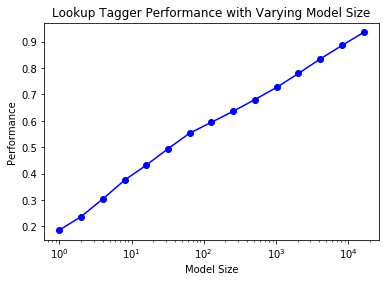

In [262]:
display()

Performance looks directly proportional to model size on logarithmic scale

#### Exercise 32
Consult the documentation for the Brill tagger demo function, using help(nltk.tag.brill.demo). Experiment with the tagger by setting different values for the parameters. Is there any trade-off between training time (corpus size) and performance?

In [272]:
from nltk.tbl import demo as brill_tagger
brill_tagger.demo()

Loading tagged data from treebank... 
Read testing data (200 sents/5251 wds)
Read training data (800 sents/19933 wds)
Read baseline data (800 sents/19933 wds) [reused the training set]
Trained baseline tagger
    Accuracy on test set: 0.8366
Training tbl tagger...
TBL train (fast) (seqs: 800; tokens: 19933; tpls: 24; min score: 3; min acc: None)
Finding initial useful rules...
    Found 12799 useful rules.

           B      |
   S   F   r   O  |        Score = Fixed - Broken
   c   i   o   t  |  R     Fixed = num tags changed incorrect -> correct
   o   x   k   h  |  u     Broken = num tags changed correct -> incorrect
   r   e   e   e  |  l     Other = num tags changed incorrect -> incorrect
   e   d   n   r  |  e
------------------+-------------------------------------------------------
  23  23   0   0  | POS->VBZ if Pos:PRP@[-2,-1]
  18  19   1   0  | NN->VB if Pos:-NONE-@[-2] & Pos:TO@[-1]
  14  14   0   0  | VBP->VB if Pos:MD@[-2,-1]
  12  12   0   0  | VBP->VB if Pos:TO@[-1]
  

Loading tagged data from treebank... 
Read testing data (200 sents/5251 wds)
Read training data (534 sents/13207 wds)
Read baseline data (266 sents/6726 wds) 
Trained baseline tagger
    Accuracy on test set: 0.7905
Training tbl tagger...
TBL train (fast) (seqs: 534; tokens: 13207; tpls: 24; min score: 3; min acc: None)
Finding initial useful rules...
    Found 36705 useful rules.

           B      |
   S   F   r   O  |        Score = Fixed - Broken
   c   i   o   t  |  R     Fixed = num tags changed incorrect -> correct
   o   x   k   h  |  u     Broken = num tags changed correct -> incorrect
   r   e   e   e  |  l     Other = num tags changed incorrect -> incorrect
   e   d   n   r  |  e
------------------+-------------------------------------------------------
 156 194  38  24  | NN->NNP if Pos:NNP@[-2,-1]
  94 102   8  19  | NN->VB if Pos:TO@[-1]
  52  54   2   1  | VBD->VBN if Pos:-NONE-@[1] & Pos:IN@[2]
  38  83  45  38  | NN->JJ if Pos:DT@[-1] & Pos:NN@[1]
  32  33   1  11  | N

   3   3   0   0  | VBP->VB if Word:and@[-2]
   3   3   0   0  | NN->NNP if Word:Mary@[-2,-1]
   3   4   1   0  | NNS->VBZ if Word:but@[-2,-1]
   3   3   0   0  | VBP->VB if Word:n't@[-2,-1]
   3   3   0   0  | JJ->NN if Word:construction@[-1,0]
   3   3   0   0  | JJ->NN if Word:education@[-1,0]
   3   3   0   1  | NN->MD if Word:must@[-1,0]
   3   3   0   1  | NN->VB if Pos:MD@[-2] & Pos:RB@[-1]
   3   3   0   0  | NN->NNP if Word:Czechoslovakia@[-1,0]
   3   3   0   0  | NN->NNP if Word:Dodge@[-1,0]
   3   3   0   0  | NN->NNP if Word:France@[-1,0]
   3   3   0   0  | NN->NNP if Word:Hong@[-1,0]
   3   3   0   0  | NN->NNP if Word:Marie-Louise@[-1,0]
   3   3   0   0  | NN->NNP if Word:Moscow@[-1,0]
   3   3   0   0  | VBN->VBD if Pos:NNP@[-1]
   3   3   0   1  | NN->NNP if Word:Yeargin@[-1,0]
   3   3   0   0  | NN->PRP if Word:itself@[-1,0]
   3   3   0   0  | NNP->NN if Word:school@[-1,0]
   3   3   0   0  | NNS->IN if Word:As@[-1,0]
   3   3   0   0  | NNS->RB if Word:sometimes@

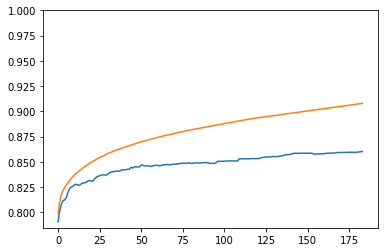

In [279]:
brill_tagger.demo_learning_curve()

#### Exercise 33
Write code that builds a dictionary of dictionaries of sets. Use it to store the set of POS tags that can follow a given word having a given POS tag, i.e. wordi → tagi → tagi+1.

In [285]:
from collections import defaultdict
d=defaultdict(set);
brown_words=brown.tagged_words();
cfd=nltk.ConditionalFreqDist((w1,t2) for ((w1,_),(w2,t2)) in nltk.bigrams(brown_words))
for w in cfd.conditions():
    d[w]=set(cfd[w].keys())

In [287]:
print(d['nice'])

{'CC', 'TO', 'WRB', 'CS', '--', 'NN', 'RB', 'VBG', '.', "''", 'JJ', '``', ',', 'RP', 'AP', 'IN', 'NNS'}


#### Exercise 34
There are 264 distinct words in the Brown Corpus having exactly three possible tags.<br>
* Print a table with the integers 1..10 in one column, and the number of distinct words in the corpus having 1..10 distinct tags in the other column. <br>
* For the word with the greatest number of distinct tags, print out sentences from the corpus containing the word, one for each possible tag.

In [317]:
import pandas as pd
cfd=nltk.ConditionalFreqDist((w.lower(),t) for w,t in brown_words);
d=defaultdict(int);
maxim=0;
for c in cfd.conditions():
    if maxim<len(cfd[c]):
        maxim=len(cfd[c]);
        word=c;
    d[len(cfd[c])]+=1;
df=pd.DataFrame.from_dict({'Tags':list(d.keys()),'Words':list(d.values())});
df=df.sort_values(by='Tags')
df.head(10)

,Tags,Words
3,1,40235
1,2,7229
2,3,1594
7,4,463
5,5,176
0,6,75
6,7,23
12,8,10
11,9,5
8,10,2


In [344]:
brown_sents=brown.tagged_sents()

In [345]:
d=defaultdict(list)
sents=[d[t].append(sent) for sent in brown_sents for (w,t) in sent if w.lower()==word]

In [346]:
d.keys()

dict_keys(['CS', 'WPS', 'DT', 'QL', 'WPO', 'CS-HL', 'DT-TL', 'WPS-TL', 'DT-HL', 'DT-NC', 'NIL', 'WPS-NC', 'WPO-NC', 'CS-NC', 'WPS-HL'])

In [350]:
cfd[word].keys()

dict_keys(['CS', 'WPS', 'DT', 'QL', 'WPO', 'CS-HL', 'DT-TL', 'WPS-TL', 'DT-HL', 'DT-NC', 'NIL', 'WPS-NC', 'WPO-NC', 'CS-NC', 'WPS-HL'])

In [347]:
for k in d.keys():
    print(d[k][0]);

[('The', 'AT'), ('Fulton', 'NP-TL'), ('County', 'NN-TL'), ('Grand', 'JJ-TL'), ('Jury', 'NN-TL'), ('said', 'VBD'), ('Friday', 'NR'), ('an', 'AT'), ('investigation', 'NN'), ('of', 'IN'), ("Atlanta's", 'NP$'), ('recent', 'JJ'), ('primary', 'NN'), ('election', 'NN'), ('produced', 'VBD'), ('``', '``'), ('no', 'AT'), ('evidence', 'NN'), ("''", "''"), ('that', 'CS'), ('any', 'DTI'), ('irregularities', 'NNS'), ('took', 'VBD'), ('place', 'NN'), ('.', '.')]
[('Regarding', 'IN'), ("Atlanta's", 'NP$'), ('new', 'JJ'), ('multi-million-dollar', 'JJ'), ('airport', 'NN'), (',', ','), ('the', 'AT'), ('jury', 'NN'), ('recommended', 'VBD'), ('``', '``'), ('that', 'CS'), ('when', 'WRB'), ('the', 'AT'), ('new', 'JJ'), ('management', 'NN'), ('takes', 'VBZ'), ('charge', 'NN'), ('Jan.', 'NP'), ('1', 'CD'), ('the', 'AT'), ('airport', 'NN'), ('be', 'BE'), ('operated', 'VBN'), ('in', 'IN'), ('a', 'AT'), ('manner', 'NN'), ('that', 'WPS'), ('will', 'MD'), ('eliminate', 'VB'), ('political', 'JJ'), ('influences', 'NN

#### Exercise 35
Write a program to classify contexts involving the word must according to the tag of the following word. Can this be used to discriminate between the epistemic and deontic uses of must?

In [354]:
print(set([t2 for ((w1,t1),(w2,t2)) in nltk.bigrams(brown_words) if w1.lower()=='must']))

{'VB', 'NIL', 'PPLS', 'ABN', 'RB', 'AT', 'VBZ', 'NP-HL', 'VB-HL', 'VB-TL', "''", 'HV', '*', 'RB-HL', 'ABX', 'HV-TL', 'PPO', 'NN', 'BE-HL', ',', 'IN', 'PPSS', 'CC', 'DO', 'BE', '.', 'NNS', 'PPS'}


In [351]:
[(w1,w2,t2) for ((w1,t1),(w2,t2)) in nltk.bigrams(brown_words) if w1.lower()=='must']

[('must', 'be', 'BE'),
 ('must', 'sign', 'VB'),
 ('must', 'hold', 'VB'),
 ('Must', 'solve', 'VB-HL'),
 ('must', 'solve', 'VB'),
 ('must', 'be', 'BE'),
 ('must', 'be', 'BE'),
 ('must', 'be', 'BE'),
 ('must', 'be', 'BE'),
 ('must', 'establish', 'VB'),
 ('must', 'be', 'BE'),
 ('Must', 'share', 'VB'),
 ('must', 'resolve', 'VB'),
 ('must', 'keep', 'VB'),
 ('must', 'make', 'VB'),
 ('must', 'have', 'HV'),
 ('must', 'persuade', 'VB'),
 ('must', 'not', '*'),
 ('must', 'be', 'BE'),
 ('must', 'plan', 'VB'),
 ('must', 'have', 'HV'),
 ('must', 'be', 'BE'),
 ('must', 'play', 'VB'),
 ('Must', 'Fall', 'VB-TL'),
 ('must', 'accomplish', 'VB'),
 ('must', 'be', 'BE'),
 ('must', 'stay', 'VB'),
 ('must', 'train', 'VB'),
 ('must', 'for', 'IN'),
 ('must', 'justify', 'VB'),
 ('must', 'be', 'BE'),
 ('must', "''", "''"),
 ('must', 'get', 'VB'),
 ('must', 'apply', 'VB'),
 ('must', 'be', 'BE'),
 ('must', 'have', 'HV'),
 ('must', 'be', 'BE'),
 ('must', 'have', 'HV'),
 ('must', 'wear', 'VB'),
 ('must', 'also', 'RB')

Yes, it can be definitely used. The grammatic rules of the contexts unclear

#### Exercise 36
Create a regular expression tagger and various unigram and n-gram taggers, incorporating backoff, and train them on part of the Brown corpus.<br>
* Create three different combinations of the taggers. Test the accuracy of each combined tagger. Which combination works best? <br>
* Try varying the size of the training corpus. How does it affect your results?

In [362]:
regexp_tagger = nltk.RegexpTagger(
      [(r'^-?[0-9]+(.[0-9]+)?$', 'CD'),   # cardinal numbers
         (r'(The|the|A|a|An|an)$', 'AT'),   # articles
        (r'.*able$', 'JJ'),                # adjectives
        (r'.*ness$', 'NN'),                # nouns formed from adjectives
         (r'.*ly$', 'RB'),                  # adverbs
         (r'.*s$', 'NNS'),                  # plural nouns
         (r'.*ing$', 'VBG'),                # gerunds
         (r'.*ed$', 'VBD'),                 # past tense verbs
         (r'.*(him|her|his|he|she|it|they|them).*','PP'),
         (r'.*', 'NN')                      # nouns (default)
     ])

In [372]:
regexp_tagger.evaluate(test_set)

0.30461261980830673

In [373]:
t0=nltk.UnigramTagger(train_set)
t0.evaluate(test_set)

0.8121006389776357

In [374]:
t0=nltk.UnigramTagger(train_set,backoff=regexp_tagger)
t0.evaluate(test_set)

0.863917731629393

In [375]:
t1=nltk.BigramTagger(train_set,backoff=t0)
t1.evaluate(test_set)

0.8737020766773163

In [369]:
t2=nltk.NgramTagger(3,train_set,backoff=t1)
t2.evaluate(test_set)

0.8712060702875399

In [370]:
t3=nltk.BigramTagger(train_set,backoff=regexp_tagger)
t3.evaluate(test_set)

0.7840455271565495

Bigram tagger with unigram and regular expression tagger works better

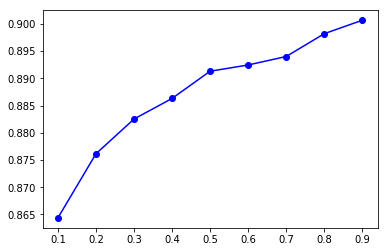

In [376]:
perfs=[]
start=0.1;
stop=0.9;
step=0.1
n=start;
while n<=stop:
    train_set=brown_sents[:round(n*len(brown_sents))]
    test_set=brown_sents[round(n*len(brown_sents)):]
    t1=nltk.BigramTagger(train_set,backoff=t0);
    perfs.append(t1.evaluate(test_set));
    n+=step;
plt.plot([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],perfs,'-bo')

Lesser the training data, lesser the accuracy. The optimal size of the training data in this case is 80%

#### Exercise 37
Our approach for tagging an unknown word has been to consider the letters of the word (using RegexpTagger()), or to ignore the word altogether and tag it as a noun (using nltk.DefaultTagger()). These methods will not do well for texts having new words that are not nouns. Consider the sentence I like to blog on Kim's blog. If blog is a new word, then looking at the previous tag (TO versus NP$) would probably be helpful. I.e. we need a default tagger that is sensitive to the preceding tag.<br>
* Create a new kind of unigram tagger that looks at the tag of the previous word, and ignores the current word. (The best way to do this is to modify the source code for UnigramTagger(), which presumes knowledge of object-oriented programming in Python.)<br>
* Add this tagger to the sequence of backoff taggers (including ordinary trigram and bigram taggers that look at words), right before the usual default tagger.<br>
* Evaluate the contribution of this new unigram tagger.

In [ ]:
# Don't know the complete grammatic rules to implement

#### Exercise 38
Consider the code in 5 which determines the upper bound for accuracy of a trigram tagger. Review Abney's discussion concerning the impossibility of exact tagging (Church, Young, & Bloothooft, 1996). Explain why correct tagging of these examples requires access to other kinds of information than just words and tags. How might you estimate the scale of this problem?

It is because grammar leaks. It is impossible to exactly identify the tag of a word as it may have different pos in a completely different context far behind it in the text. It also depends on the overall genre of the text

#### Exercise 39
Use some of the estimation techniques in nltk.probability, such as Lidstone or Laplace estimation, to develop a statistical tagger that does a better job than n-gram backoff taggers in cases where contexts encountered during testing were not seen during training.

#### Exercise 40
Inspect the diagnostic files created by the Brill tagger rules.out and errors.out. Obtain the demonstration code by accessing the source code (at http://www.nltk.org/code) and create your own version of the Brill tagger. Delete some of the rule templates, based on what you learned from inspecting rules.out. Add some new rule templates which employ contexts that might help to correct the errors you saw in errors.out.

In [ ]:
# to do

#### Exercise 41
Develop an n-gram backoff tagger that permits "anti-n-grams" such as ["the", "the"] to be specified when a tagger is initialized. An anti-ngram is assigned a count of zero and is used to prevent backoff for this n-gram (e.g. to avoid estimating P(the | the) as just P(the)).

In [ ]:
# to do

#### Exercise 42
Investigate three different ways to define the split between training and testing data when developing a tagger using the Brown Corpus: genre (category), source (fileid), and sentence. Compare their relative performance and discuss which method is the most legitimate. (You might use n-fold cross validation, discussed in 3, to improve the accuracy of the evaluations.)

#### Exercise 43
Develop your own NgramTagger class that inherits from NLTK's class, and which encapsulates the method of collapsing the vocabulary of the tagged training and testing data that was described in this chapter. Make sure that the unigram and default backoff taggers have access to the full vocabulary.

In [ ]:
# to do 